In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv("C:/Users/inida/OneDrive/Documents/DSN/data-science-nigeria-bank-campaign-subscriptions/train.csv")
test = pd.read_csv("C:/Users/inida/OneDrive/Documents/DSN/data-science-nigeria-bank-campaign-subscriptions/test.csv")
samplesubmission = pd.read_csv("C:/Users/inida/OneDrive/Documents/DSN/data-science-nigeria-bank-campaign-subscriptions/sample_submission.csv")

In [5]:
train.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
0,customer_id_39075,31,admin.,married,university.degree,no,no,no,cellular,dec,...,3,999,1,failure,-2.97,46.3565,-23.10,1.711,5023.5,0
1,customer_id_34855,31,technician,single,university.degree,no,no,no,telephone,may,...,4,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0
2,customer_id_7107,47,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,...,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0,0
3,customer_id_31614,36,services,married,university.degree,no,no,no,cellular,may,...,1,999,1,failure,-1.77,46.4465,-32.34,2.329,5099.1,0
4,customer_id_34878,34,admin.,single,high.school,no,no,no,cellular,may,...,9,999,0,nonexistent,-1.77,46.4465,-32.34,2.252,5099.1,0


In [6]:
test.head()

,customer_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,customer_id_32884,59,technician,married,high.school,no,no,yes,cellular,may,...,6.183333,1,999,1,failure,-1.77,46.4465,-32.34,2.301,5099.1
1,customer_id_3169,57,unknown,married,unknown,unknown,yes,no,telephone,may,...,4.750000,2,999,0,nonexistent,1.13,46.9970,-25.48,5.862,5191.0
2,customer_id_32206,35,blue-collar,married,basic.9y,no,no,no,cellular,may,...,0.866667,1,999,1,failure,-1.77,46.4465,-32.34,2.315,5099.1
3,customer_id_9403,38,admin.,married,high.school,no,no,no,telephone,jun,...,5.916667,4,999,0,nonexistent,1.43,47.2325,-29.26,5.969,5228.1
4,customer_id_14020,29,housemaid,married,high.school,no,yes,no,cellular,jul,...,3.150000,2,999,0,nonexistent,1.43,46.9590,-29.89,5.965,5228.1


In [7]:
samplesubmission.head()

,customer_id,subscribed
0,customer_id_32884,1
1,customer_id_3169,1
2,customer_id_32206,1
3,customer_id_9403,1
4,customer_id_14020,1


In [8]:
target = [col for col in train.columns if col not in test.columns]



In [9]:
target

['subscribed']

In [10]:
train.info

<bound method DataFrame.info of              customer_id  age          job  marital            education  \
0      customer_id_39075   31       admin.  married    university.degree   
1      customer_id_34855   31   technician   single    university.degree   
2       customer_id_7107   47  blue-collar  married             basic.6y   
3      customer_id_31614   36     services  married    university.degree   
4      customer_id_34878   34       admin.   single          high.school   
...                  ...  ...          ...      ...                  ...   
28826   customer_id_6265   60      retired  married  professional.course   
28827  customer_id_11284   39   management  married    university.degree   
28828  customer_id_38158   37       admin.  married          high.school   
28829    customer_id_860   42   management  married    university.degree   
28830  customer_id_15795   31       admin.   single    university.degree   

       default housing loan    contact month  ... campa

In [11]:
train.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,subscribed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,42.011203,4.297919,2.575769,963.215844,0.172592,0.113202,46.788632,-28.360564,4.623599,5167.011880,0.112761
std,10.450128,4.336882,2.752303,185.077567,0.494338,1.570978,0.289847,3.244405,1.735202,72.542598,0.316305
min,19.000000,0.000000,1.000000,0.000000,0.000000,-3.370000,46.100500,-35.560000,1.636000,4963.600000,0.000000
25%,34.000000,1.700000,1.000000,999.000000,0.000000,-1.770000,46.537500,-29.890000,2.346000,5099.100000,0.000000
50%,40.000000,3.000000,2.000000,999.000000,0.000000,1.130000,46.874500,-29.260000,5.859000,5191.000000,0.000000
75%,49.000000,5.300000,3.000000,999.000000,0.000000,1.430000,46.997000,-25.480000,5.963000,5228.100000,0.000000
max,100.000000,81.966667,43.000000,999.000000,7.000000,1.430000,47.383500,-18.830000,6.047000,5228.100000,1.000000


In [12]:
missing_data = train.isnull().sum()
missing_data[missing_data > 0]

Series([], dtype: int64)

In [13]:
missing_data = test.isnull().sum()
missing_data[missing_data > 0]

Series([], dtype: int64)

In [14]:
train.dtypes

customer_id        object
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
subscribed          int64
dtype: object

In [15]:
# from pandas_profiling import ProfileReport

In [16]:
# train.profile_report()

In [17]:
train.dtypes

customer_id        object
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
subscribed          int64
dtype: object

0    25580
1     3251
Name: subscribed, dtype: int64



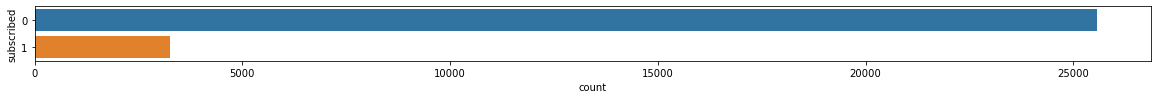

In [18]:
#How many people suscribed
print(train.subscribed.value_counts())
print()

plt.figure(figsize =(20,1))
sns.countplot(y = "subscribed", data=train)
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_cols = [ "marital","job","education","default","housing","loan","contact","month","day_of_week","poutcome", "customer_id"]
for col in cat_cols:
    train[col] =le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

In [20]:
train.drop(["customer_id"], 1, inplace= True)
test.drop(["customer_id"], 1, inplace= True)

In [21]:
X = train.drop("subscribed", axis=1)
y = train["subscribed"]

In [22]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100)

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
GBclassifier = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   random_state = 5)
GBclassifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features='sqrt',
                           min_samples_leaf=15, min_samples_split=10,
                           n_estimators=1000, random_state=5)

In [49]:
GB_prediction = GBclassifier.predict(X_test)

In [50]:
def ConfusionMatrix(ytest, ypred, label = ["not_subscribed", "subscribed"]):
    "A beautiful confusion matrix function to check the model performance"
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(ytest, ypred)
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
    plt.xlabel('Predicted', fontsize = 13)
    plt.xticks([0.5, 1.5], label)
    plt.yticks([0.5, 1.5], label)
    plt.ylabel('Truth', fontsize = 13)
    plt.title('A confusion matrix');

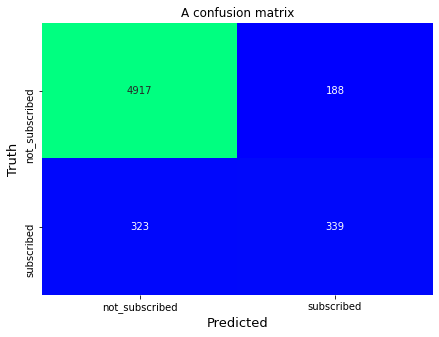

In [51]:
ConfusionMatrix(y_test, GB_prediction, label= ["not_subscribed", "subscribed"])

In [52]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_score(y_test, GB_prediction)

0.9113924050632911

In [53]:
f1_score(y_test, GB_prediction)

0.5702270815811605

In [54]:
test_pred = GBclassifier.predict(test)

In [55]:
# submission = pd.DataFrame(Test)
submission = pd.read_csv("C:/Users/inida/OneDrive/Documents/DSN/data-science-nigeria-bank-campaign-subscriptions/sample_submission.csv")
submission.subscribed = test_pred
submission.head()

,customer_id,subscribed
0,customer_id_32884,0
1,customer_id_3169,0
2,customer_id_32206,0
3,customer_id_9403,0
4,customer_id_14020,0


In [57]:
submission.to_csv("my_drafted_submission.csv", index=False)